## IoT Assignment 2

### Importing and preparing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras

tf.random.set_seed(42)

In [3]:
# Download the dataset from https://www.kaggle.com/datasets/gaurav2022/mobile-health
df_health = pd.read_csv('mhealth_raw_data.csv')
print("The dataset is of the format: ",df_health.shape)
print("A sample of the dataset is: ", df_health.head())

The dataset is of the format:  (1215745, 14)
A sample of the dataset is:        alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1  


In [11]:
# Plot the distribution of the data
# df_health.hist(figsize=(20,20))
# plt.show()

# Plot the correlation matrix
# corr = df_health.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(corr, annot=True, fmt='.1f')

# Other visualizations
plt.figure(figsize=(20,20))
sns.pairplot(df_health, hue='Activity')
plt.show()


In [5]:
from sklearn.utils import resample
 
df_health_majority = df_health[df_health.Activity==0]
print("The majority class is: ",df_health_majority.shape)
df_health_minorities = df_health[df_health.Activity!=0]
print("The minority classes are: ",df_health_minorities.shape)

# Downsample majority class
df_health_majority_downsampled = resample(df_health_majority,n_samples=30000, random_state=42)
df_health = pd.concat([df_health_majority_downsampled, df_health_minorities])
df_health.Activity.value_counts()

The majority class is:  (872550, 14)
The minority classes are:  (343195, 14)


1     30720
2     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [6]:
#Dropping feature have data outside 98% confidence interval
df_health1 = df_health.copy()
for feature in df_health1.columns[:-2]:
  lower_range = np.quantile(df_health[feature],0.01)
  upper_range = np.quantile(df_health[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df_health1 = df_health1.drop(df_health1[(df_health1[feature]>upper_range) | (df_health1[feature]<lower_range)].index, axis=0)
  print('shape',df_health1.shape)

alx range: -11.47312 to 19.233
shape (365733, 14)
aly range: -19.379 to 2.447871999999997
shape (360018, 14)
alz range: -18.95 to 14.19623999999999
shape (356270, 14)
glx range: -0.74212 to 0.80705
shape (349377, 14)
gly range: -1.0694 to 0.96623
shape (342841, 14)
glz range: -1.1061 to 0.8290799999999999
shape (337391, 14)
arx range: -21.492 to 9.097647999999998
shape (332307, 14)
ary range: -18.694000000000003 to 11.948059999999998
shape (326241, 14)
arz range: -10.367 to 11.823119999999996
shape (323674, 14)
grx range: -1.0196 to 0.95686
shape (320188, 14)
gry range: -1.1417 to 0.90965
shape (315352, 14)
grz range: -0.69828 to 1.125
shape (310929, 14)


In [7]:
# Mappping the labels to the activities
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

# Modeling Data Preparation

In [8]:
#spliting data into train and test set
print(df_health1.shape)
train = df_health1[(df_health1['subject'] != 'subject10') & (df_health1['subject'] != 'subject9')]
test = df_health1.drop(train.index, axis=0)
print(train.shape,test.shape)

(310929, 14)
(246501, 14) (64428, 14)


In [9]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(246501, 12) (246501,) (64428, 12) (64428,)


In [10]:
X_train_ankle = X_train[['alx','aly','alz','glx','gly','glz']];
X_train_arm = X_train[['arx','ary','arz','grx','gry','grz']];
X_test_ankle = X_test[['alx','aly','alz','glx','gly','glz']];
X_test_arm = X_test[['arx','ary','arz','grx','gry','grz']];
y_train_ankle = y_train
y_train_arm = y_train
y_test_ankle = y_test
y_test_arm = y_test
print(X_train_ankle.shape,X_train_arm.shape,X_test_ankle.shape,X_test_arm.shape)

(246501, 6) (246501, 6) (64428, 6) (64428, 6)


In [11]:
from scipy import stats

#function to create time series datset for sequence modeling
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [12]:
# Creating time series dataset with both ankle and arm data
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
print(X_train.shape, y_train.shape)
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
print(X_test.shape, y_test.shape)

(4929, 100, 12) (4929, 1)
(1287, 100, 12) (1287, 1)


In [13]:
# Creating time series dataset with ankle data and arm data separately
X_train_ankle,y_train_ankle = create_dataset(X_train_ankle, y_train_ankle, 100, step=50)
X_train_arm,y_train_arm = create_dataset(X_train_arm, y_train_arm, 100, step=50)
X_test_ankle,y_test_ankle = create_dataset(X_test_ankle, y_test_ankle, 100, step=50)
X_test_arm,y_test_arm = create_dataset(X_test_arm, y_test_arm, 100, step=50)
print(X_train_ankle.shape,y_train_ankle.shape,X_train_arm.shape,y_train_arm.shape)

(4929, 100, 6) (4929, 1) (4929, 100, 6) (4929, 1)


# Model building

In [14]:
from tensorflow.keras.models import Model

# Input layer
inputs = layers.Input(shape=[100,12])

# Conv1D layer, with 16 filters, kernel size 3, and padding
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(inputs)
# Batch normalization layer followed by dropout layer
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)

# First LSTM layer with 64 units with attention layer
lstm1 = layers.LSTM(64,return_sequences=True)
query_features = lstm1(dropout)
value_features = lstm1(dropout)
attention = layers.Attention()([query_features,value_features])

# Second LSTM layer with 64 units with attention layer
lstm2 = layers.LSTM(64,return_sequences=True)
query_features = lstm2(attention)
value_features = lstm2(attention)
attention2 = layers.Attention()([query_features,value_features])

# Branch 1: Third LSTM layer with 64 units
lstm3 = layers.LSTM(64)(attention2)

# Branch 2: Dense layer with 64 units followed by batch normalization and dropout layer
# Then another dense layer with 64 units followed by batch normalization and dropout layer
branch1 = layers.Dense(units = 64, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(branch1)
dropout1 = layers.Dropout(0.2)(bn1)
dense2 = layers.Dense(units = 64, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(bn2)

# Branch 3: Dense layer with 64 units followed by batch normalization and dropout layer
# Then another dense layer with 64 units followed by batch normalization and dropout layer
branch2 = layers.Dense(units = 64, activation='relu')(lstm3)
bn3 = layers.BatchNormalization()(branch2)
dropout3 = layers.Dropout(0.2)(bn3)
dense3 = layers.Dense(units = 64, activation='relu')(dropout3)
bn4 = layers.BatchNormalization()(dense3)
dropout4 = layers.Dropout(0.2)(bn4)

# Concatenate the three branches
concatenated = layers.concatenate([lstm3,dropout2,dropout4])

# Dense layer with 64 units followed by batch normalization and dropout layer
dense4 = layers.Dense(units = 64, activation = 'relu')(concatenated)
outputs = layers.Dense(units = 13, activation='softmax')(dense4)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model with adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 12)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 100, 16)      592         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 16)     64          ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 100, 16)      0           ['batch_normalization[0][0]']

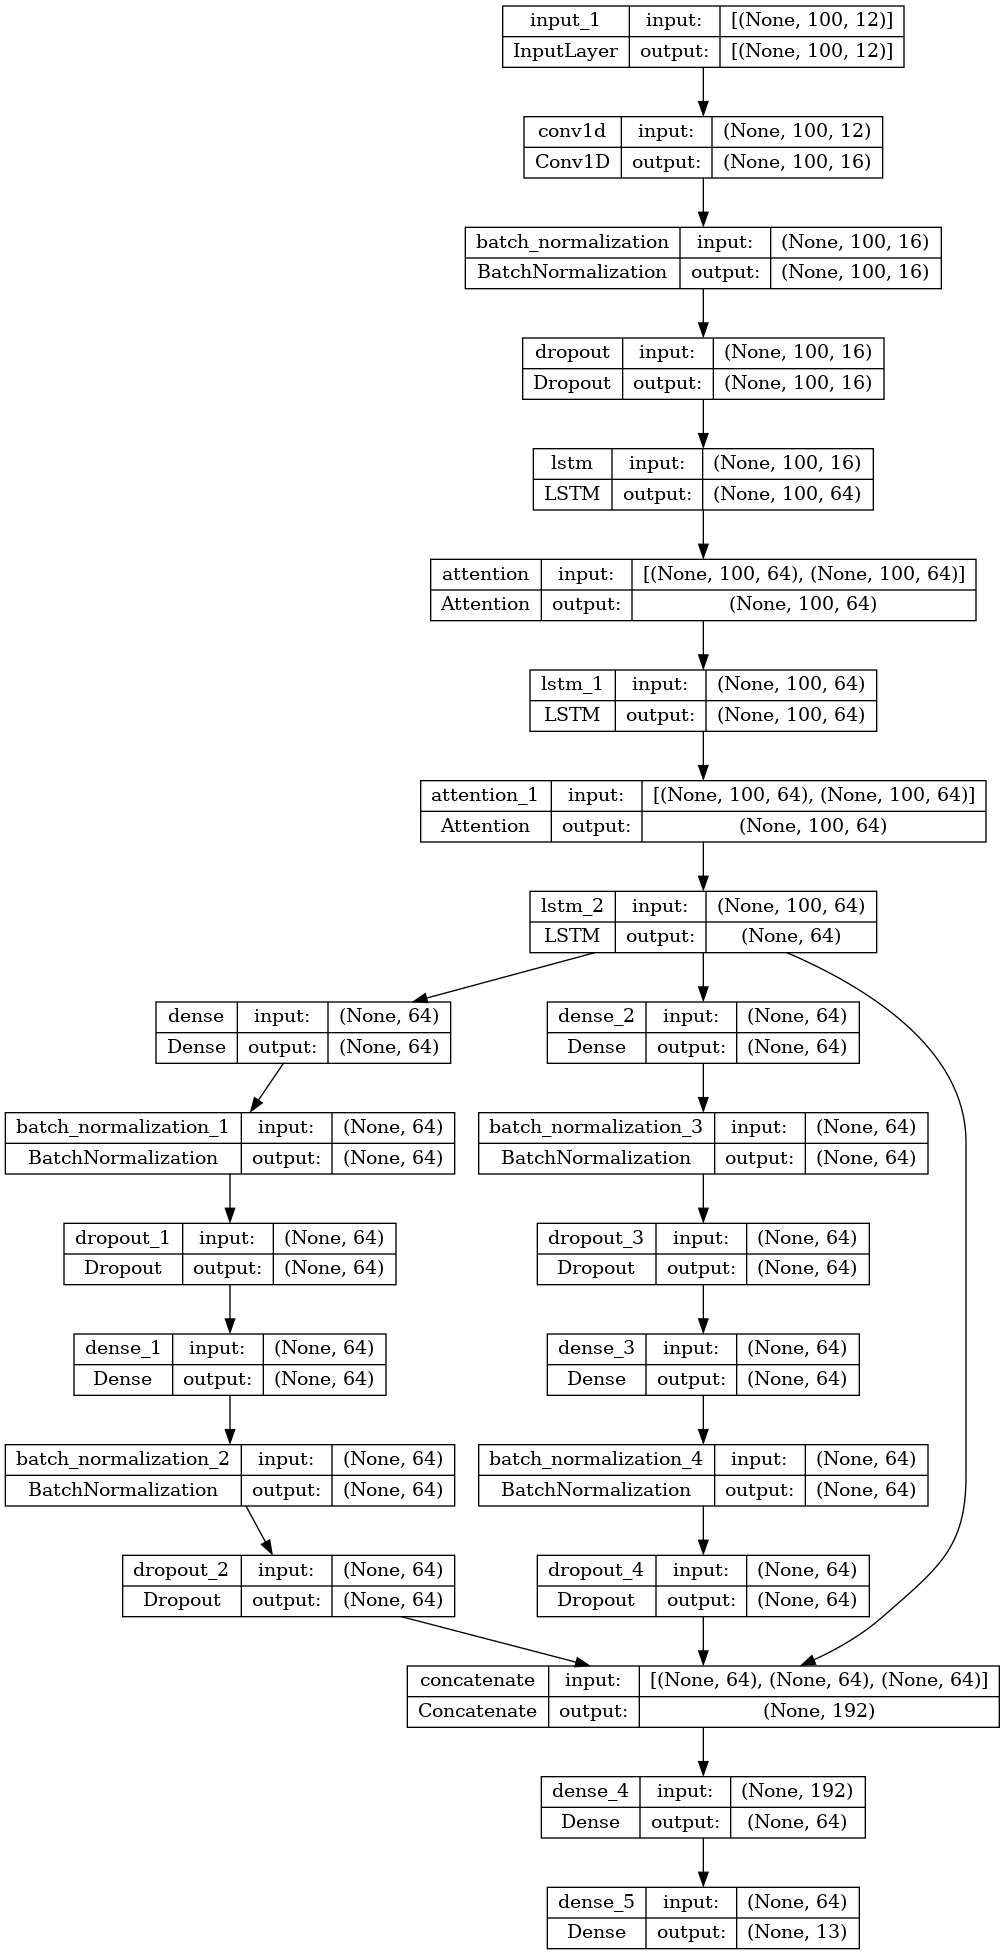

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file = 'model.png')

In [17]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
model_history = model.fit(X_train,y_train, epochs= 20, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/20
155/155 [==============================] - 50s 236ms/step - loss: 0.7974 - sparse_categorical_accuracy: 0.7470 - val_loss: 1.2305 - val_sparse_categorical_accuracy: 0.7203
Epoch 2/20
155/155 [==============================] - 34s 221ms/step - loss: 0.2751 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.2986 - val_sparse_categorical_accuracy: 0.9378
Epoch 3/20
155/155 [==============================] - 35s 223ms/step - loss: 0.1760 - sparse_categorical_accuracy: 0.9489 - val_loss: 0.3671 - val_sparse_categorical_accuracy: 0.8702
Epoch 4/20
155/155 [==============================] - 35s 225ms/step - loss: 0.1323 - sparse_categorical_accuracy: 0.9619 - val_loss: 0.1669 - val_sparse_categorical_accuracy: 0.9526
Epoch 5/20
155/155 [==============================] - 35s 225ms/step - loss: 0.1256 - sparse_categorical_accuracy: 0.9637 - val_loss: 0.2980 - val_sparse_categorical_accuracy: 0.9169
Epoch 6/20
155/155 [==============================] - 35s 226ms/step - loss: 0.1016 -

# Model Evaluation

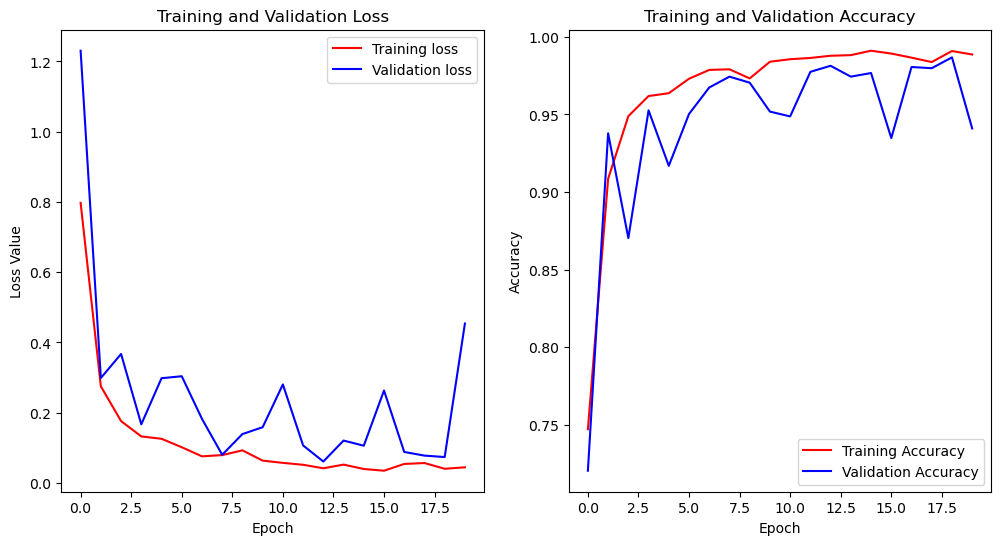

In [18]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = keras.models.load_model('./mhealth_best.h5')

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 3s 66ms/step - loss: 0.0609 - sparse_categorical_accuracy: 0.9814
Train accuracy 99.76 %
Train loss 0.011100356467068195
Test accuracy 98.14 %
Test loss 0.060858745127916336


In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)
print(pred.shape,y_test.shape)

41/41 [==============================] - 5s 67ms/step
(1287, 1) (1287, 1)


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       0.99      0.99      0.99       123
           2       0.99      1.00      1.00       123
           3       0.99      1.00      1.00       122
           4       0.99      0.98      0.99       120
           5       0.93      0.99      0.96        84
           6       0.93      0.98      0.95       106
           7       1.00      0.98      0.99       112
           8       0.97      0.88      0.92       116
           9       0.99      0.99      0.99       121
          10       0.99      0.99      0.99        89
          11       0.98      1.00      0.99        52
          12       1.00      1.00      1.00        27

    accuracy                           0.98      1287
   macro avg       0.98      0.98      0.98      1287
weighted avg       0.98      0.98      0.98      1287

**************************************************
[[ 92   0   0   0   0   0   

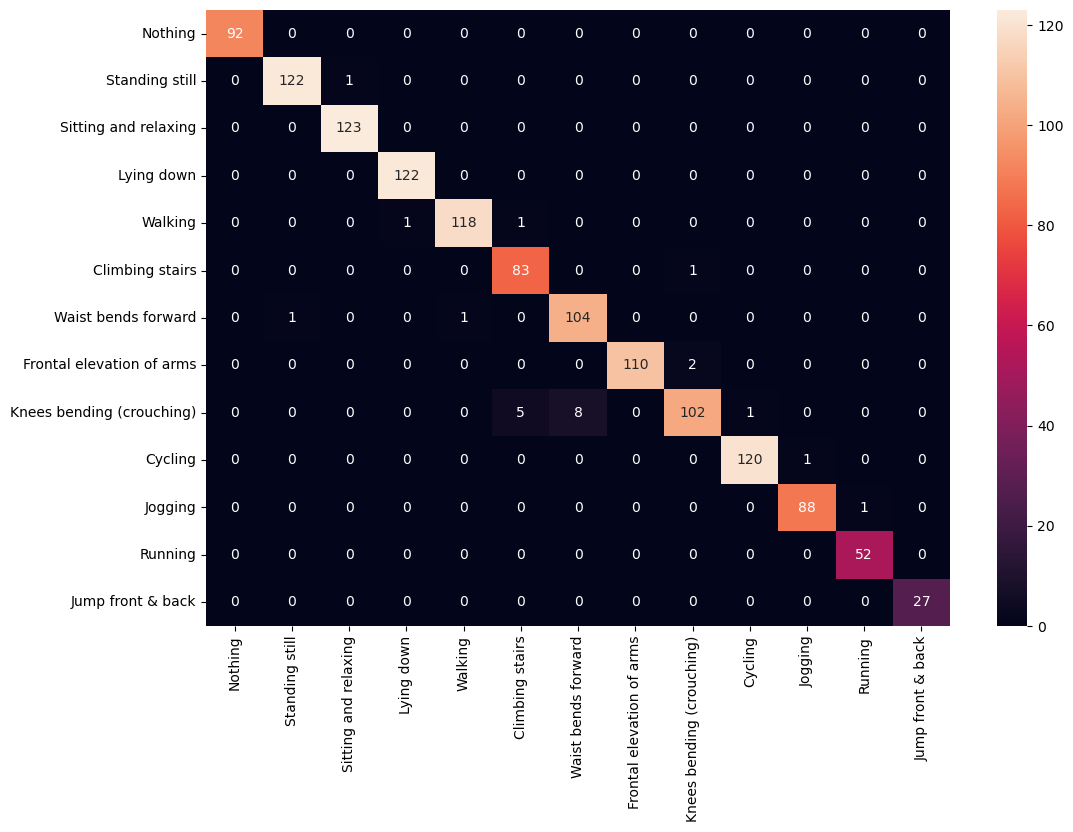

In [22]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

Model building for Arm and Ankle Data Separately

In [23]:
from tensorflow.keras.models import Model
inputs = layers.Input(shape=[100,6])
cv1d = layers.Conv1D(filters=16, kernel_size=3, padding="same")(inputs)
bn = layers.BatchNormalization()(cv1d)
dropout = layers.Dropout(0.2)(bn)

lstm1 = layers.LSTM(64,return_sequences=True)
query_features = lstm1(dropout)
value_features = lstm1(dropout)
attention = layers.Attention()([query_features,value_features])

lstm2 = layers.LSTM(64,return_sequences=True)
query_features = lstm2(attention)
value_features = lstm2(attention)
attention2 = layers.Attention()([query_features,value_features])

lstm3 = layers.LSTM(64)(attention2)


branch1 = layers.Dense(units = 64, activation='relu')(lstm3)
bn1 = layers.BatchNormalization()(branch1)
dropout1 = layers.Dropout(0.2)(bn1)
dense2 = layers.Dense(units = 64, activation='relu')(dropout1)
bn2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(bn2)

branch2 = layers.Dense(units = 64, activation='relu')(lstm3)
bn3 = layers.BatchNormalization()(branch2)
dropout3 = layers.Dropout(0.2)(bn3)
dense3 = layers.Dense(units = 64, activation='relu')(dropout3)
bn4 = layers.BatchNormalization()(dense3)
dropout4 = layers.Dropout(0.2)(bn4)

concatenated = layers.concatenate([lstm3,dropout2,dropout4])
dense4 = layers.Dense(units = 64, activation = 'relu')(concatenated)
outputs = layers.Dense(units = 13, activation='softmax')(dense4)

model1 = Model(inputs=inputs, outputs=outputs)
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [24]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 6)]     0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 100, 16)      304         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 100, 16)     64          ['conv1d_1[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 dropout_5 (Dropout)            (None, 100, 16)      0           ['batch_normalization_5[0][

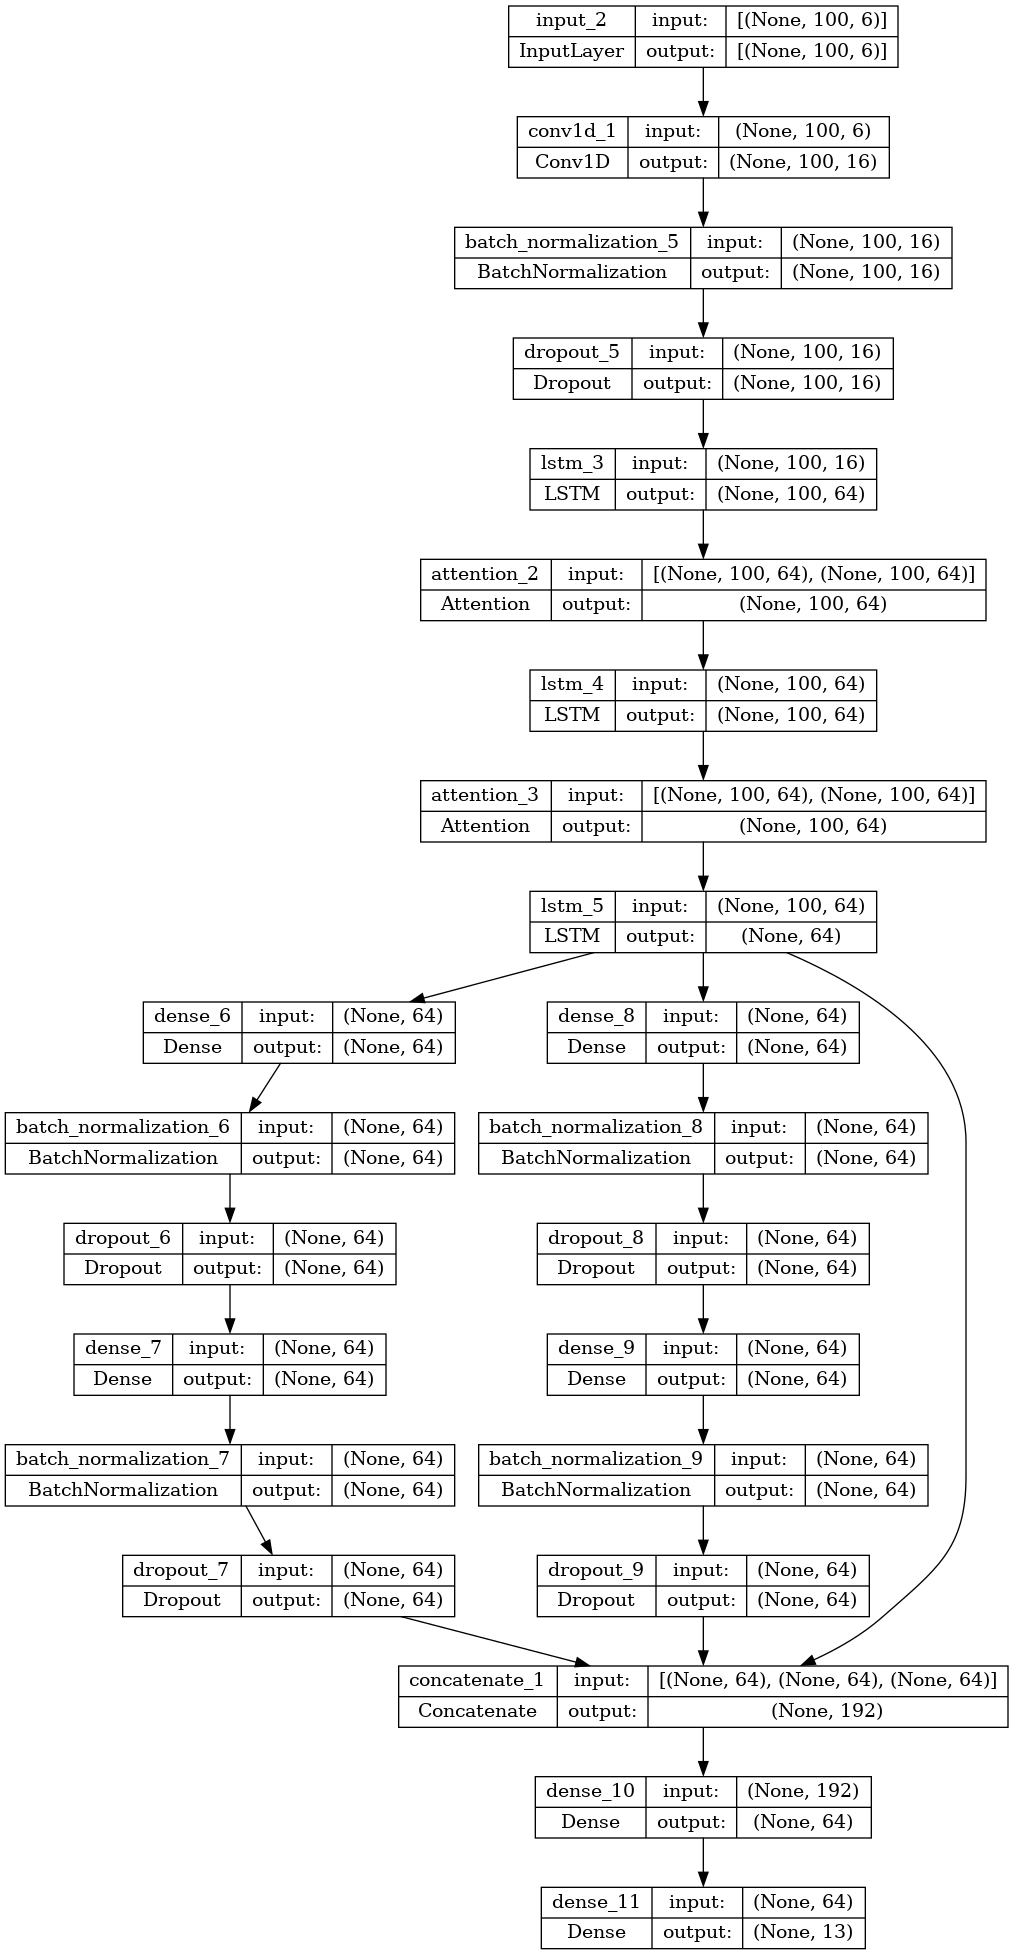

In [25]:
tf.keras.utils.plot_model(model1, show_shapes=True, to_file='model1.png')

In [26]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_ankle_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
model_history1 = model1.fit(X_train_ankle,y_train_ankle, epochs= 5, validation_data=(X_test_ankle,y_test_ankle), callbacks=callbacks)

Epoch 1/5
155/155 [==============================] - 51s 244ms/step - loss: 1.1780 - sparse_categorical_accuracy: 0.5829 - val_loss: 1.6412 - val_sparse_categorical_accuracy: 0.4872
Epoch 2/5
155/155 [==============================] - 35s 229ms/step - loss: 0.5763 - sparse_categorical_accuracy: 0.7772 - val_loss: 0.9062 - val_sparse_categorical_accuracy: 0.7537
Epoch 3/5
155/155 [==============================] - 35s 229ms/step - loss: 0.4277 - sparse_categorical_accuracy: 0.8387 - val_loss: 1.1954 - val_sparse_categorical_accuracy: 0.7716
Epoch 4/5
155/155 [==============================] - 35s 228ms/step - loss: 0.3713 - sparse_categorical_accuracy: 0.8600 - val_loss: 1.1308 - val_sparse_categorical_accuracy: 0.7653
Epoch 5/5
155/155 [==============================] - 36s 232ms/step - loss: 0.3557 - sparse_categorical_accuracy: 0.8663 - val_loss: 2.5584 - val_sparse_categorical_accuracy: 0.6348


In [27]:
callbacks = [keras.callbacks.ModelCheckpoint("mhealth_arm_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
model_history2 = model1.fit(X_train_arm,y_train_arm, epochs= 5, validation_data=(X_test_arm,y_test_arm), callbacks=callbacks)

Epoch 1/5
155/155 [==============================] - 36s 232ms/step - loss: 1.0564 - sparse_categorical_accuracy: 0.6435 - val_loss: 1.0785 - val_sparse_categorical_accuracy: 0.6900
Epoch 2/5
155/155 [==============================] - 37s 236ms/step - loss: 0.4202 - sparse_categorical_accuracy: 0.8436 - val_loss: 0.3719 - val_sparse_categorical_accuracy: 0.8601
Epoch 3/5
155/155 [==============================] - 35s 229ms/step - loss: 0.3064 - sparse_categorical_accuracy: 0.8911 - val_loss: 0.3838 - val_sparse_categorical_accuracy: 0.8462
Epoch 4/5
155/155 [==============================] - 35s 228ms/step - loss: 0.2420 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.5335 - val_sparse_categorical_accuracy: 0.8244
Epoch 5/5
155/155 [==============================] - 35s 228ms/step - loss: 0.2005 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.2369 - val_sparse_categorical_accuracy: 0.9060


Model Evalution for Arm and Ankle Data Separately

In [28]:
model1 = keras.models.load_model('./mhealth_ankle_best.h5')

train_loss, train_acc = model1.evaluate(X_train_ankle,y_train_ankle)
test_loss, test_acc = model1.evaluate(X_test_ankle,y_test_ankle)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 3s 66ms/step - loss: 0.9062 - sparse_categorical_accuracy: 0.7537
Train accuracy 83.42 %
Train loss 0.5464469790458679
Test accuracy 75.37 %
Test loss 0.9062090516090393


In [29]:
model2 = keras.models.load_model('./mhealth_arm_best.h5')

train_loss, train_acc = model2.evaluate(X_train_arm,y_train_arm)
test_loss, test_acc = model2.evaluate(X_test_arm,y_test_arm)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 3s 65ms/step - loss: 0.2369 - sparse_categorical_accuracy: 0.9060
Train accuracy 95.96 %
Train loss 0.11075565218925476
Test accuracy 90.6 %
Test loss 0.23693278431892395


### Methodology:
1. Gathering the data: Loading the data MHealth dataset (downloaded from https://www.kaggle.com/datasets/gaurav2022/mobile-health)
2. Preprocessing the data: The data is resampled to ensure that the data is evenly distributed. The data is then split into train and test sets. Those features are dropped which fall outside the 98% confidence interval to remove the outliers. The data is then converted into a time series format, 3D array of shape (n_samples, n_timesteps, n_features) for the model.
3. Model building: The model consist of various layers, including Input layer, Conv1D layer, Batch normalization layer, Dropout layer, LSTM layer, Attention layer, Dense layer, and Output layer. The model is compiled using the Adam optimizer and the loss function is sparse_categorical_crossentropy.
4. Model evaluation: The model is evaluated using the accuracy score and the confusion matrix.